# Shakespeare Deep Learning

## Importing libraries and dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras.utils as ku 
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import re



In [2]:
data = open("shakespeare.txt").read()
data[:500]

"THE SONNETS\n\nby William Shakespeare\n\nFrom fairest creatures we desire increase,\nThat thereby beauty's rose might never die,\nBut as the riper should by time decease,\nHis tender heir might bear his memory:\nBut thou contracted to thine own bright eyes,\nFeed'st thy light's flame with self-substantial fuel,\nMaking a famine where abundance lies,\nThy self thy foe, to thy sweet self too cruel:\nThou that art now the world's fresh ornament,\nAnd only herald to the gaudy spring,\nWithin thine own bud buriest"

## WordCloud

In [3]:
wordcloud = WordCloud(max_font_size=70, max_words=200,
                   background_color="white").generate(data)

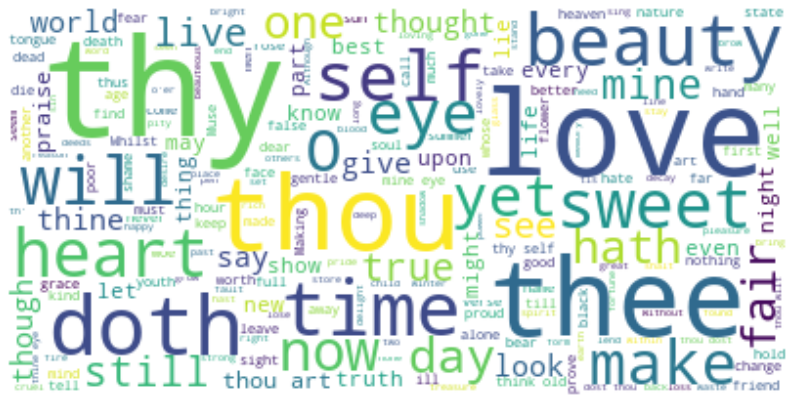

In [4]:
plt.rcParams['savefig.dpi'] = 300
plt.figure(figsize = (14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("poemcloud.png")
plt.show()

## Investigating the corpus

In [5]:
corpus = data.lower().split("\n")
corpus

['the sonnets',
 '',
 'by william shakespeare',
 '',
 'from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou contracted to thine own bright eyes,',
 "feed'st thy light's flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thy self thy foe, to thy sweet self too cruel:',
 "thou that art now the world's fresh ornament,",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content,',
 "and tender churl mak'st waste in niggarding:",
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 '',
 'when forty winters shall besiege thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery so gazed on now,",
 'will be a tattered weed of small worth held:  ',
 'then being asked, where all thy beauty lies,',
 'where all the treasure of thy lu

## Removing characters

In [7]:
type(corpus)
mycorpus = [re.compile(r"by william shakespeare").sub("", m) for m in corpus]
finalcorpus = [re.compile(r"the sonnets").sub("", m) for m in mycorpus]
finalcorpus

['',
 '',
 '',
 '',
 'from fairest creatures we desire increase,',
 "that thereby beauty's rose might never die,",
 'but as the riper should by time decease,',
 'his tender heir might bear his memory:',
 'but thou contracted to thine own bright eyes,',
 "feed'st thy light's flame with self-substantial fuel,",
 'making a famine where abundance lies,',
 'thy self thy foe, to thy sweet self too cruel:',
 "thou that art now the world's fresh ornament,",
 'and only herald to the gaudy spring,',
 'within thine own bud buriest thy content,',
 "and tender churl mak'st waste in niggarding:",
 'pity the world, or else this glutton be,',
 "to eat the world's due, by the grave and thee.",
 '',
 'when forty winters shall besiege thy brow,',
 "and dig deep trenches in thy beauty's field,",
 "thy youth's proud livery so gazed on now,",
 'will be a tattered weed of small worth held:  ',
 'then being asked, where all thy beauty lies,',
 'where all the treasure of thy lusty days;',
 'to say within thine

In [8]:
length = []
for line in corpus:
    length.append(len(line))
pd.Series(length).describe()

count    2469.000000
mean       37.183880
std        14.648481
min         0.000000
25%        38.000000
50%        42.000000
75%        45.000000
max        59.000000
dtype: float64

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)

print(total_words)

3200


## Creating train and target

In [10]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

train, target = input_sequences[:,:-1],input_sequences[:,-1]
target = ku.to_categorical(target, num_classes=total_words+1)

In [11]:
model = Sequential()
model.add(Embedding(total_words+1, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words+1/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           320100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 3200)              323200    
_________________________________________________________________
dense_1 (Dense)              (None, 3201)              10246401  
Total params: 11,351,301
Trainable params: 11,351,301
Non-trainable params: 0
____________________________________________

In [12]:
history = model.fit(train, target, epochs=160, verbose=1)

Epoch 1/160
485/485 [==============================] - 34s 71ms/step - loss: 6.8601 - accuracy: 0.0204
Epoch 2/160
485/485 [==============================] - 34s 71ms/step - loss: 6.4898 - accuracy: 0.0238
Epoch 3/160
485/485 [==============================] - 34s 71ms/step - loss: 6.3859 - accuracy: 0.0252
Epoch 4/160
485/485 [==============================] - 34s 69ms/step - loss: 6.2631 - accuracy: 0.0329
Epoch 5/160
485/485 [==============================] - 34s 71ms/step - loss: 6.1670 - accuracy: 0.0369
Epoch 6/160
485/485 [==============================] - 34s 69ms/step - loss: 6.0844 - accuracy: 0.0389
Epoch 7/160
485/485 [==============================] - 34s 70ms/step - loss: 6.0024 - accuracy: 0.0416
Epoch 8/160
485/485 [==============================] - 34s 71ms/step - loss: 5.9168 - accuracy: 0.0464
Epoch 9/160
485/485 [==============================] - 34s 70ms/step - loss: 5.8221 - accuracy: 0.0499
Epoch 10/160
485/485 [==============================] - 34s 71ms/step - l

485/485 [==============================] - 34s 70ms/step - loss: 1.3667 - accuracy: 0.7621
Epoch 80/160
485/485 [==============================] - 34s 69ms/step - loss: 1.3418 - accuracy: 0.7671
Epoch 81/160
485/485 [==============================] - 34s 70ms/step - loss: 1.3238 - accuracy: 0.7695
Epoch 82/160
485/485 [==============================] - 34s 70ms/step - loss: 1.3242 - accuracy: 0.7649
Epoch 83/160
485/485 [==============================] - 36s 74ms/step - loss: 1.3097 - accuracy: 0.7717
Epoch 84/160
485/485 [==============================] - 35s 72ms/step - loss: 1.2831 - accuracy: 0.7741
Epoch 85/160
485/485 [==============================] - 34s 71ms/step - loss: 1.2820 - accuracy: 0.7737
Epoch 86/160
485/485 [==============================] - 33s 69ms/step - loss: 1.2678 - accuracy: 0.7760
Epoch 87/160
485/485 [==============================] - 34s 69ms/step - loss: 1.2620 - accuracy: 0.7751
Epoch 88/160
485/485 [==============================] - 34s 70ms/step - loss:

485/485 [==============================] - 30s 63ms/step - loss: 0.8755 - accuracy: 0.8295
Epoch 158/160
485/485 [==============================] - 30s 63ms/step - loss: 0.8636 - accuracy: 0.8316
Epoch 159/160
485/485 [==============================] - 31s 63ms/step - loss: 0.8615 - accuracy: 0.8310
Epoch 160/160
485/485 [==============================] - 30s 63ms/step - loss: 0.8638 - accuracy: 0.8321


## Plotting results

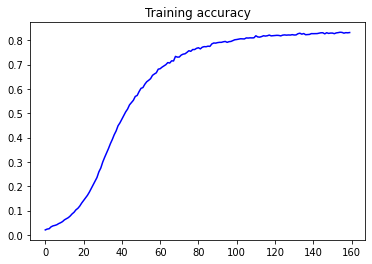

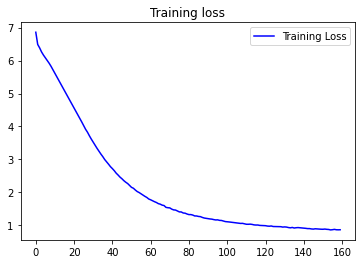

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

# Attempting text generator

In [15]:
seed_text = "tonight you are mine, completely"
next_words = 300
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

tonight you are mine, completely eye and heart so sweetly doth stand erred expired burned forth room gems groan of you never erred decrease ride decrease room room seen torn bright held held else flowers more short expired burned purge burned burned decrease else done forth me long more lies bright seen now live young hate flowers o'er else mistaking clears told to heart buried life live now you contains live in thee more fire but express of thee you be seen you rare decease rare flowers 'tis young young red flowers to done done bright trust fixed you made bright flowers so flowers so burn to stand told proceeds lips to joy time's woe heaven bearing too minds dead dead lips red hate hate of told a sad ward ward defaced plot seen well sea's nought gems gems gems done nothing else done thee more mistaking so bright say so made you prove thee more might speak flowers to change he are still well mine eyes set else trust you leaves cross reap ' gems gems gems decrease did place bright told 